In [1]:
# Imports 
import numpy as np
import matplotlib.pyplot as plt


In this notebook, we will walk through an example of gradient descent as we discussed in class. First, we need a dataset. Let's create a dataset so we know the "ground truth" (the actual answer). That way, we can compare our results and assess how well we did. 

In the dataset before, our actual model is $y = 3.5 \times x + 2.0$. 

In [2]:

# Generate synthetic data
np.random.seed(42)
X = 2 * np.random.rand(150, 1)  # 150 random points between 0 and 2
true_w = 3.5
true_b = 2.0
y = true_w * X + true_b + np.random.randn(150, 1)  # Add some noise


Let's now visualize our data so we have a clear sense of a good answer.

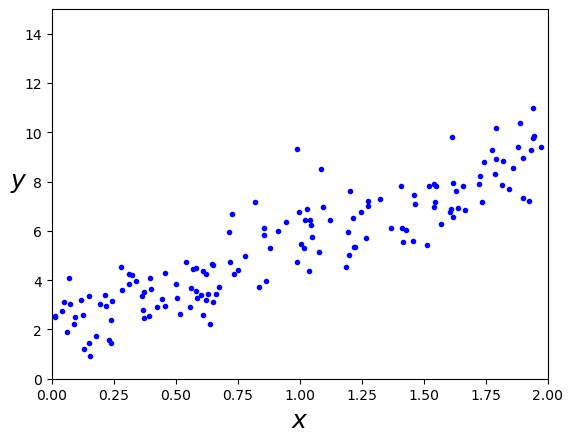

In [3]:
# plot the data
plt.plot(X, y, "b.")
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

Next, we need to perform gradient descent. This process starts with an initial guess. We'll just pick random numbers. 

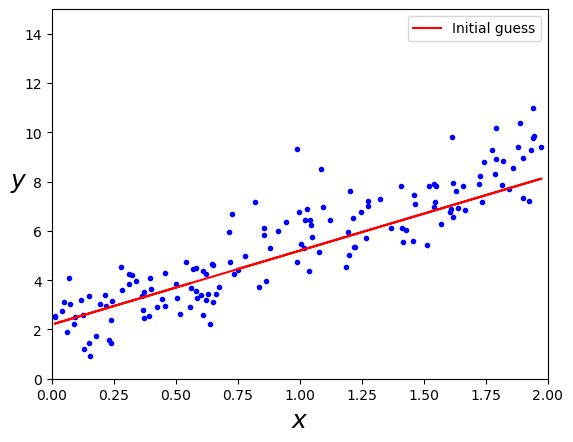

In [4]:
# initial parameters 
w = 3.0
b = 2.2

# plot initial guess 
plt.plot(X, y, "b.")
plt.plot(X, w * X + b, "r-", label="Initial guess")
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.legend()
plt.show()

Let's first do this process with the **mean absolute error**: $ \frac{1}{n} \sum_{i=1}^n |y_i - \hat y_i|.$ We'll do the process discussed in class, but we have to incorporate something called a "learning rate." This learning rate is to mitigate the case when the derivatives are very big. We know we want to adjust the parameters according to the sign of the derivative. But sometimes derivatives are too big that it can cause a lot of chaos in the method. Instead, we will multiple the derivatives by a very small number (our learning rate) to ensure that our changes are incremental. This makes for a more stable algorithm. 

Remember from class that this algorithm is a loop that we repeat. The number of repeats, called **epochs**, will also be set. Here' we will set it to 1000. 

Now, if you've taken CSCI 250, you know that we should have a way to evaluate our model. To do this, we will set aside a testing set as well. Because we know the ground truth, I will go ahead and just generate a new set (to act as a testing set) at the end. 

*Key Words* 
1. **parameters** - coefficients and constant term (not the argument of the function)
2. **epoch** - 1 adjustment of those parameters. 
3. **learning rate** - A value to adjust the speed of change within one epoch. 

The partial derivatives of the error function, $ \frac{1}{n} \sum_{i=1}^n |  y_i - y_i|,$ are 

* $\frac{dE}{dw} = \frac{1}{n} \sum_{i=1}^n sgn( \hat y_i - y_i) * x_i$

* $\frac{dE}{db} = \frac{1}{n} \sum_{i=1}^n sgn( \hat y_i - y_i) * 1$

In [5]:
# Hyperparameters
learning_rate = 0.2 # CHOICE 
epochs = 100 # CHOICE

# Number of samples
m = len(X)

# Gradient descent loop
for epoch in range(epochs):
    # Predictions (applying the model to the input data)
    y_pred = w * X + b
    
    # The derivatives of the error with respect to the parameters
    dw = (1 / m) * np.sum(np.sign(y_pred - y) * X)
    db = (1 / m) * np.sum(np.sign(y_pred - y))
    
    # Adjust the parameters with the derviatives adjusted according to the learning rate 
    w -= learning_rate * dw
    b -= learning_rate * db
    
    # Print progress every 100 epochs -- so we see if we're actually making progress
    if epoch % 10 == 0:
        loss = np.mean((y - y_pred) ** 2)
        print(f"Epoch {epoch}: Loss = {loss:.4f}, w = {w:.4f}, b = {b:.4f}")

# Final parameters
print(f"Final parameters: w = {w:.4f}, b = {b:.4f}")



Epoch 0: Loss = 1.2778, w = 3.0545, b = 2.2453
Epoch 10: Loss = 1.0959, w = 3.2912, b = 2.3413
Epoch 20: Loss = 1.0868, w = 3.3561, b = 2.2933
Epoch 30: Loss = 1.0791, w = 3.3940, b = 2.2507
Epoch 40: Loss = 1.0747, w = 3.4131, b = 2.2187
Epoch 50: Loss = 1.0706, w = 3.4302, b = 2.1973
Epoch 60: Loss = 1.0695, w = 3.4363, b = 2.1920
Epoch 70: Loss = 1.0696, w = 3.4333, b = 2.1893
Epoch 80: Loss = 1.0695, w = 3.4355, b = 2.1920
Epoch 90: Loss = 1.0696, w = 3.4324, b = 2.1893
Final parameters: w = 3.4358, b = 2.1920


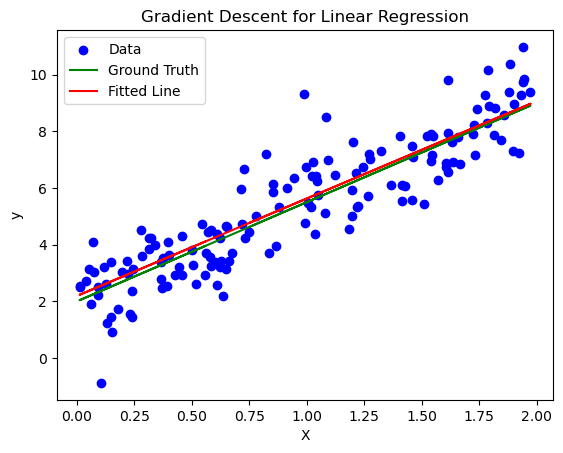

In [6]:
# Plot the data and the fitted line
plt.scatter(X, y, color='blue', label='Data')
plt.plot(X, true_w * X + true_b, color='green', label='Ground Truth')
plt.plot(X, w * X + b, color='red', label='Fitted Line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Gradient Descent for Linear Regression')
plt.legend()
plt.show()

How do I know that my choices made were good ones? We do this by referring to another set called a "validation set," which is not seen by the algorithm. 

When these values are roughly the same, we aren't overfitting. 

In [7]:
X_val = 2 * np.random.rand(40, 1) 
y_val = true_w * X_val + true_b + np.random.randn(40, 1)

y_pred_val = w * X_val + b
loss = np.mean((y_val - y_pred_val) ** 2)
print(f"Validation Loss = {loss:.4f}")

y_pred_train = w * X + b
loss = np.mean((y - y_pred_train) ** 2)
print(f"Train Loss = {loss:.4f}")

Validation Loss = 0.5600
Train Loss = 1.0701


In [8]:
# initial parameters
w = 3.0
b = 2.2

# Hyperparameters
learning_rate = 0.01 # CHOICE 
epochs = 1000 # CHOICE

# Number of samples
m = len(X)

# Store losses for plotting
train_losses = []
val_losses = []

# Gradient descent loop
for epoch in range(epochs):
    # Predictions (applying the model to the input data)
    y_pred = w * X + b
    
    # The derivatives of the error with respect to the parameters
    dw = (1 / m) * np.sum(np.sign(y_pred - y) * X)
    db = (1 / m) * np.sum(np.sign(y_pred - y))
    
    # Adjust the parameters with the derviatives adjusted according to the learning rate 
    w -= learning_rate * dw
    b -= learning_rate * db
    
    # Print progress every 100 epochs -- so we see if we're actually making progress
    if epoch % 1 == 0:
       
        # Training loss
        y_pred = w * X + b
        loss = np.mean((y - y_pred) ** 2)
        train_losses.append(loss)
        print(f"Epoch {epoch}: Training Loss = {loss:.4f}, w = {w:.4f}, b = {b:.4f}")
        
        # Validation loss
        y_pred_val = w * X_val + b
        val_loss = np.mean((y_val - y_pred_val) ** 2)
        val_losses.append(val_loss)
        print(f"Epoch {epoch}: Validation Loss = {val_loss:.4f}, w = {w:.4f}, b = {b:.4f}")

# Final parameters
print(f"Final parameters: w = {w:.4f}, b = {b:.4f}")



Epoch 0: Training Loss = 1.2736, w = 3.0027, b = 2.2023
Epoch 0: Validation Loss = 0.9374, w = 3.0027, b = 2.2023
Epoch 1: Training Loss = 1.2694, w = 3.0055, b = 2.2045
Epoch 1: Validation Loss = 0.9314, w = 3.0055, b = 2.2045
Epoch 2: Training Loss = 1.2654, w = 3.0082, b = 2.2068
Epoch 2: Validation Loss = 0.9254, w = 3.0082, b = 2.2068
Epoch 3: Training Loss = 1.2613, w = 3.0109, b = 2.2091
Epoch 3: Validation Loss = 0.9195, w = 3.0109, b = 2.2091
Epoch 4: Training Loss = 1.2573, w = 3.0136, b = 2.2113
Epoch 4: Validation Loss = 0.9136, w = 3.0136, b = 2.2113
Epoch 5: Training Loss = 1.2534, w = 3.0164, b = 2.2136
Epoch 5: Validation Loss = 0.9078, w = 3.0164, b = 2.2136
Epoch 6: Training Loss = 1.2495, w = 3.0191, b = 2.2159
Epoch 6: Validation Loss = 0.9021, w = 3.0191, b = 2.2159
Epoch 7: Training Loss = 1.2458, w = 3.0218, b = 2.2180
Epoch 7: Validation Loss = 0.8965, w = 3.0218, b = 2.2180
Epoch 8: Training Loss = 1.2421, w = 3.0245, b = 2.2201
Epoch 8: Validation Loss = 0.891

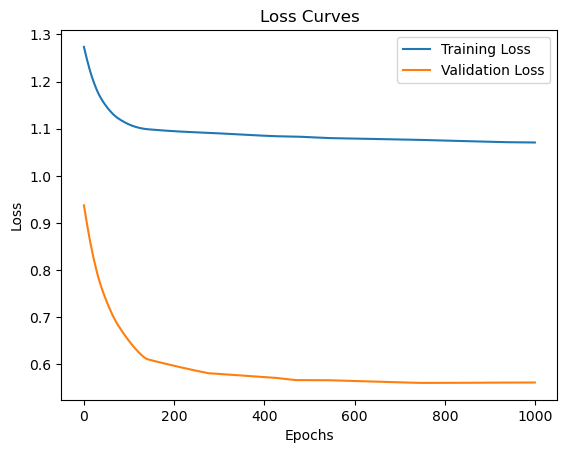

In [9]:
# Plot the loss curves
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curves')
plt.legend()
plt.show()

When our training loss is better than our validation loss, we have likely overfitted. This is because of the number of Epochs we've used. Ideally, what you want to do is have three sets: (1) a training set, (2) a validation set, and (3) a testing set. The training set is the one used for the algorithm. The validation set is the one used to select the epochs. The testing set is the one that helps us evaluate the quality of our final model. 

Let's repeat this process properly, using the **mean absolute error** instead. As a reminder, this error is $\frac{1}{n} = \sum_{i=1}^n |y_i - \hat y_i|$. 

Why the mean absolute error? This is really more meaningful than the mean squared error. the only reason we use the mean squared error everywhere is because the underlying math is easy. But with gradient descent, we are not limited to any cost function! 

In [10]:
# Generate synthetic data -- split into training, validation, and test sets
np.random.seed(0)
n = 150
X = 2 * np.random.rand(n, 1) 
true_w = -2.1
true_b = 1.3
y = true_w * X + true_b + np.random.randn(n, 1)  # Add some noise

n_val = 40
X_val = 2 * np.random.rand(n_val, 1)
y_val = true_w * X_val + true_b + np.random.randn(n_val, 1)

n_test = 40
X_test = 2 * np.random.rand(n_test, 1)
y_test = true_w * X_test + true_b + np.random.randn(n_test, 1)

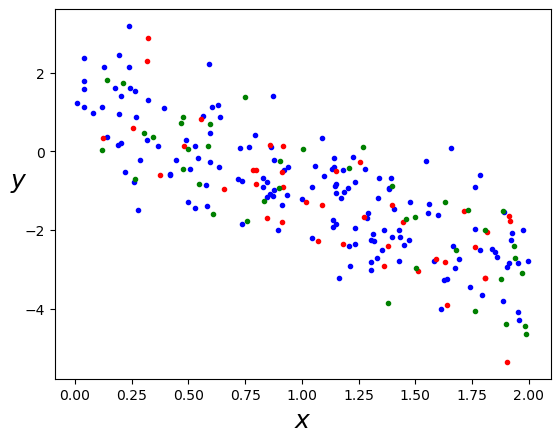

In [11]:
# Let's plot the three datasets just to see what they look like
plt.plot(X, y, "b.")
plt.plot(X_val, y_val, "r.") # validation is red
plt.plot(X_test, y_test, "g.") # test is green
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.show()


Now that we have our data, let's write out our loop. For the sake of neatness, let's organize it into a function. 

In [12]:
# Hyperparameters
learning_rate = 0.1
epochs = 1000

def one_step(X:np.ndarray, y:np.ndarray, w:float, b:float, learning_rate:float) -> tuple:
    """One epoch of gradient descent"""
    m = len(X)
    y_pred = w * X + b

    # Compute partial derivatives for mean absolute error 
    residual = y - y_pred
    dw = -(1 / m) * np.sum(np.sign(residual) * X)
    db = -(1 / m) * np.sum(np.sign(residual))

    # Adjust the parameters
    w = w - learning_rate * dw
    b = b - learning_rate * db

    return w, b # Return the updated parameters

def gradient_descent(X:np.ndarray, y:np.ndarray, X_val:np.ndarray, y_val:np.ndarray, learning_rate:float, 
                     epochs:int, type:str="Validation", prints:int=100) -> tuple:
    """Gradient Descent algortihm for linear regression with MAE loss"""

    # Random guess for parameters
    w = np.random.randn()  # Random initial value for weight
    b = np.random.randn()  # Random initial value for bias

    # Store the losses for later evaluation
    losses = []
    val_losses = []

    # Gradient descent
    for epoch in range(epochs):
        w, b = one_step(X, y, w, b, learning_rate) # Update the parameters

        # store process for later evaluation 
        loss = np.mean(np.abs(y - (w * X + b)))
        val_loss = np.mean(np.abs(y_val - (w * X_val + b)))
        losses.append(loss)
        val_losses.append(val_loss)
        
        if epoch % prints == 0: # Print progress every 100 epochs
            print(f"Epoch {epoch}: Loss = {loss:.4f}, w = {w:.4f}, b = {b:.4f}")
            print(type + f" Loss = {val_loss:.4f}")
        
    return w, b, losses, val_losses


In [13]:
w, b, losses, val_losses = gradient_descent(X, y, X_val, y_val, learning_rate, epochs)

# Final parameters
print(f"Final parameters: w = {w:.4f}, b = {b:.4f}")

Epoch 0: Loss = 1.1298, w = -0.3677, b = -0.2588
Validation Loss = 1.2312
Epoch 100: Loss = 0.7860, w = -1.6689, b = 0.5852
Validation Loss = 0.7855
Epoch 200: Loss = 0.7545, w = -1.9785, b = 0.9945
Validation Loss = 0.7665
Epoch 300: Loss = 0.7496, w = -2.0891, b = 1.1772
Validation Loss = 0.7686
Epoch 400: Loss = 0.7491, w = -2.1233, b = 1.2159
Validation Loss = 0.7703
Epoch 500: Loss = 0.7490, w = -2.1357, b = 1.2399
Validation Loss = 0.7736
Epoch 600: Loss = 0.7490, w = -2.1456, b = 1.2545
Validation Loss = 0.7750
Epoch 700: Loss = 0.7490, w = -2.1441, b = 1.2559
Validation Loss = 0.7757
Epoch 800: Loss = 0.7490, w = -2.1458, b = 1.2545
Validation Loss = 0.7749
Epoch 900: Loss = 0.7490, w = -2.1450, b = 1.2545
Validation Loss = 0.7751
Final parameters: w = -2.1455, b = 1.2545


Now, let's study the validation and the training metrics together. When the validation is worse than the training, we are likely overfitting. 

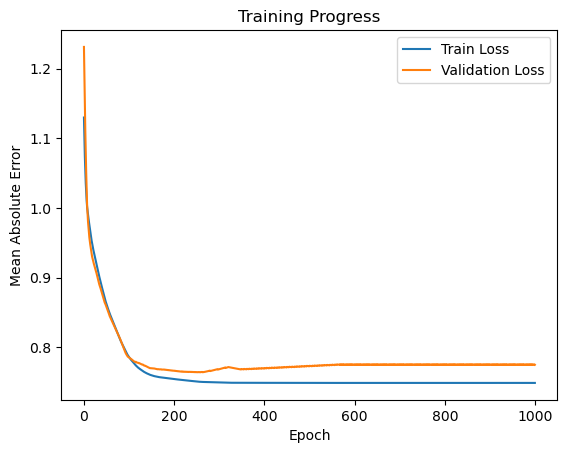

In [14]:
# Plot losses 
plt.plot(losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.title('Training Progress')
plt.legend()

There seems to be overfitting around the point of 100 epochs. So this is what we will pick when creating the final model. 

In [15]:
# combine X and X_val for plotting
X_all = np.concatenate([X, X_val])
y_all = np.concatenate([y, y_val])

# Compute the new, final model 
w, b, losses, test_losses = gradient_descent(X_all, y_all, X_test, y_test, learning_rate, 100, "Test", 25)

Epoch 0: Loss = 3.5121, w = 1.6320, b = 0.6045
Test Loss = 3.7311
Epoch 25: Loss = 1.1014, w = -0.3657, b = -0.6229
Test Loss = 1.2348
Epoch 50: Loss = 0.9631, w = -0.8398, b = -0.3429
Test Loss = 1.0666
Epoch 75: Loss = 0.8930, w = -1.1244, b = -0.0376
Test Loss = 0.9798


Overall, we still have some overfitting since the training loss is a little bit better than our test loss, but only mildly. Overall, this seems like a good model. 

Because we know the ground truth, let's compare the two. 

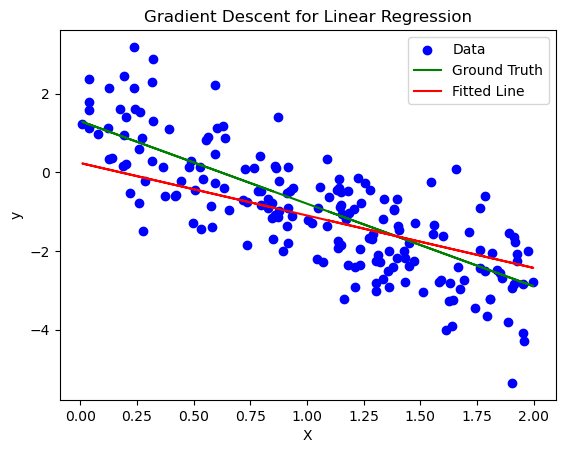

In [16]:
# Plot the data and the fitted line
plt.scatter(X_all, y_all, color='blue', label='Data')
plt.plot(X_all, true_w * X_all + true_b, color='green', label='Ground Truth')
plt.plot(X_all, w * X_all + b, color='red', label='Fitted Line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Gradient Descent for Linear Regression')
plt.legend()
plt.show()